In [6]:
import pandas as pd

In [7]:
data=pd.DataFrame(pd.read_csv('CC GENERAL.csv'))
data=data.drop('CUST_ID',axis=1)

In [8]:
data.isnull().sum()
null=data[['CREDIT_LIMIT','MINIMUM_PAYMENTS']]

In [9]:
null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CREDIT_LIMIT      8949 non-null   float64
 1   MINIMUM_PAYMENTS  8637 non-null   float64
dtypes: float64(2)
memory usage: 140.0 KB


In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imputer = SimpleImputer(strategy='mean')  # You can use 'median', 'most_frequent', etc.
imputed_array = imputer.fit_transform(null)
imputed_df = pd.DataFrame(imputed_array, columns=null.columns)

# Replace original columns
data[null.columns] = imputed_df

In [12]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [13]:
m=KMeans(n_clusters=5,random_state=50)
m.fit(data)

KMeans(n_clusters=5, random_state=50)

In [14]:
data['c']=m.predict(data)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


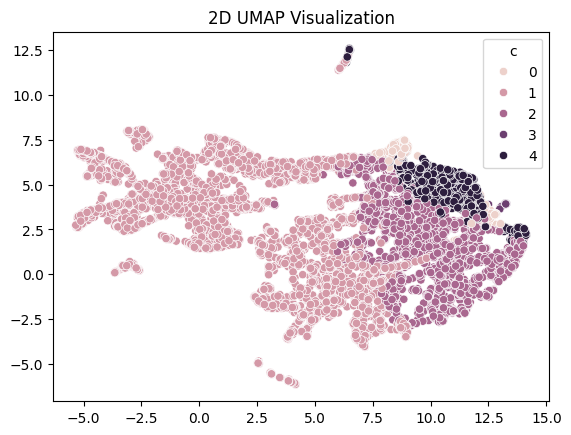

In [16]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt

reduced = umap.UMAP(n_components=2, random_state=42).fit_transform(data)

sns.scatterplot(data,x=reduced[:, 0], y=reduced[:, 1],hue='c')
plt.title("2D UMAP Visualization")
plt.show()